## Object Detection 객체 탐지

- Classification과 Bounding box 문제 모두 해결하는 것.
- 자율 주행차, OCR 기술 문제 등에 활용이 되고 있다.


1. `Two stage detector`
2. `Single stage detecor`
3. 최신 detection 방법

---
## *Two-stage Detector*

## 1. R-CNN

1. Selective Search로 region proposals를 먼저 실행한다. (2000개 이하로)
2. 각 region proposals를 이미지 Classification Network의 input으로 wrapping한다. (사이즈 조절)
3. 기존의 trained 된 CNN 모델 사용 (feature extractor로 사용)
4. 마지막에 카테고리를 classification 한다. 맨 마지막의 classifier는 고전적인 SVM을 사용해서 object detection을 했었음.

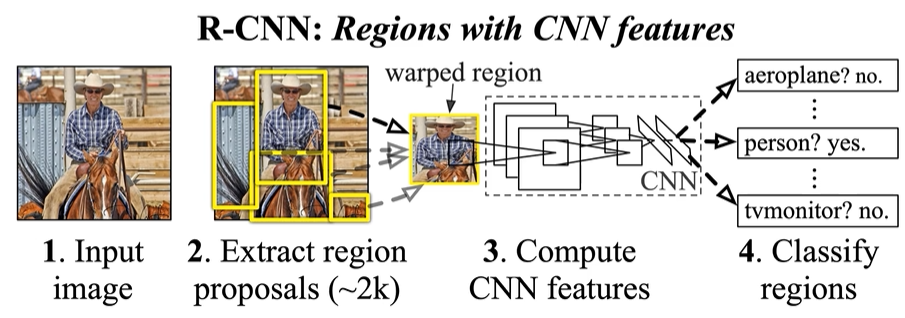

### 단점
- 각 region proposals마다 모델에 넣어서 processing을 하기 때문에 속도가 느리다.
- Selective search 같은 hand designed된 알고리즘을 사용하기 때문에 학습을 통한 성능 향상에 한계가 존재함

## 2. Fast R-CNN
- R-CNN의 느린 속도를 극복하고자 나왔음.
- 영상 전체에 대한 feature를 한번에 추출하고, 이를 재활용해서 여러 object들을 detection 한다.


1. CNN에서 conv layer까지 미리 feature를 뽑아놓고, (tensor 형태를 갖고 있음)

2. ROI pooling을 진행 함. 한번 뽑아놓은 feature를 여러번 재활용하기 위해서임
    - ROI(region of interest) : region proposals이 제시한 물체의 후보 위치를 의미함.
    - 바운딩 박스가 주어지면, ROI에 해당하는 feature만을 추출하고
    - 일정 사이즈로 resampling(resize)를 한다.
    - 이를 ROI pooling layer라 한다.
    

3. class와 더 정밀한 bbox 위치를 추정하기 위해서, classification과 regression을 수행함.

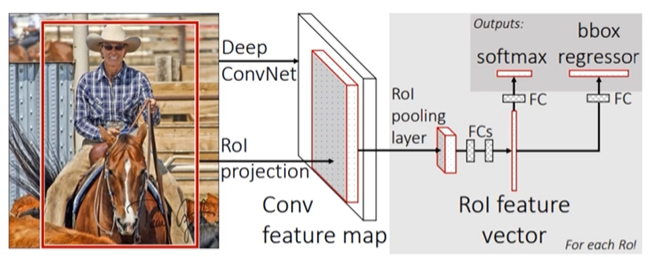

### 단점
- 여전히 region proposals은 selective search처럼 별도의 알고리즘을 사용하고 있다.
- 데이터만으로 성능을 높이기에는 한계가 존재하게 된다.

---
## 3. Faster R-CNN
- fast r-cnn의 region proposals 개선하기 위해 나왔음.
- region proposals을 뉴럴 네트워크 기반으로 대체했음.
- Region proposal Network라는 `RPN` 모듈을 제안함.
- 최초의 end to end object detection network 이다.

### 진행 순서
1. 영상 하나에서 공유되는 feature map를 뽑아 놓는다.
2. RPN에서 region proposals를 여러개 제안하고,
3. 이를 이용해서 ROI pooling을 실행한다.
4. classification과 regression을 수행한다.

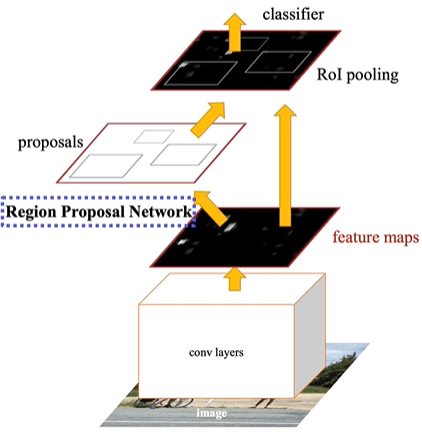


### IOU (Intersection over Union)
- 두 영역의 overlap을 측정하는 기준 (metric)
- 두 영역의 교집합을 합집합으로 나누는 것.

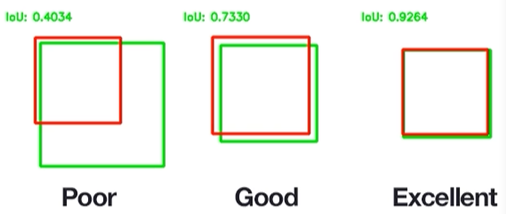

### Anchor boxes
- fast r-cnn의 region proposals을 anchor boxes로 구현했다.
- 각 위치에서 발생할 것 같은 박스를 미리 정의해 놓은 후보군 이다.
- faster r-cnn에서는 서로 다른 비율 3개, 서로 다른 크기 3개로 총 9개의 anchor box를 사용한다. (파라미터 조절 가능)


- 학습할 때는 Ground Truth가 1개인데, GT와 가장 align이 잘 되는 box를 positive sample로 판별하고(IoU > 0.7) 나머지는 negative sample로 판별한다.
- negative에 대한 loss를 줘서 학습을 하게 된다.

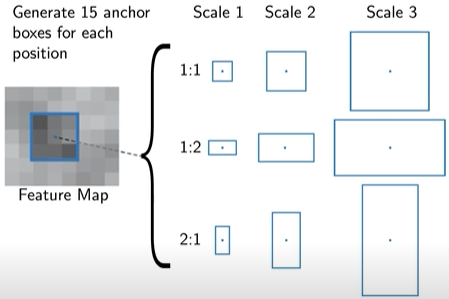

### RPN
- CNN 모델의 feature map을 input으로 받음
- 매 위치마다 K개의 anchor boxes 고려함.
- 각 위치에서 256 dimension의 feature vector를 추출하고,
    - 2K 개의 scores를 뱉는다. (object가 있는지 아닌지)
    - 4K 개의 regression output을 뱉는다. (좌표값들)

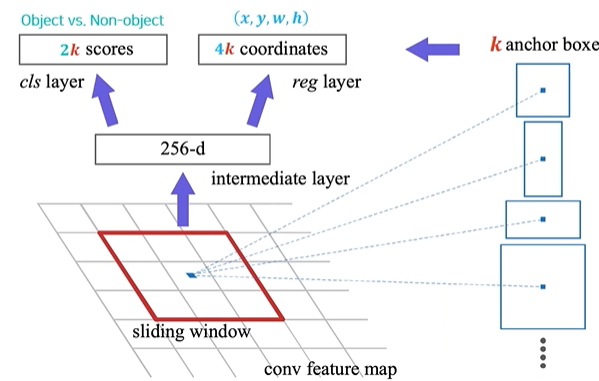

### NMS (Non Maximum Suppression)
- bbox들이 엄청나게 겹치고 중복된다.
- 이를 효과적으로 필터링해주기 위해 NMS를 사용한다.
- 그럴듯한 bbox만 남겨두고 나머지는 제거하는 알고리즘

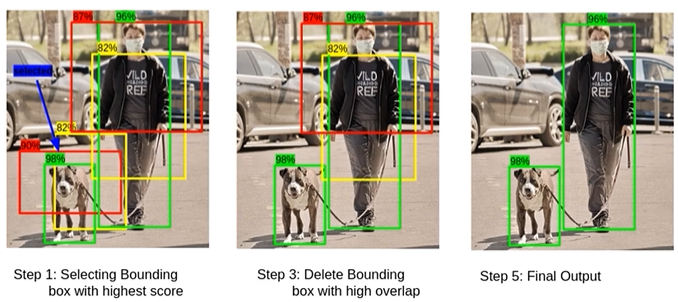

---
## *One-stage Detection*

- region proposals를 기반으로 한 ROI pooling을 사용하지 않는다.
- 구조가 간단하기 때문에 수행 시간이 매우 빠르다. (real-time)
- two-stage보다 정확도가 높지는 않음.

## 1. YOLO
1. input 이미지를 SxS 이미지로 나누고 (grid로 만든다)
2. 각 grid에서 B개의 box 좌표와 confidence score, 그리고 class score를 예측한다.
    - anchor boxes 와 유사함.
    - 미리 B개의 bbox를 정하고, 더 정교한 box로 regression한다.


3. NMS 알고리즘을 통해 최종 bbox를 결정한다.

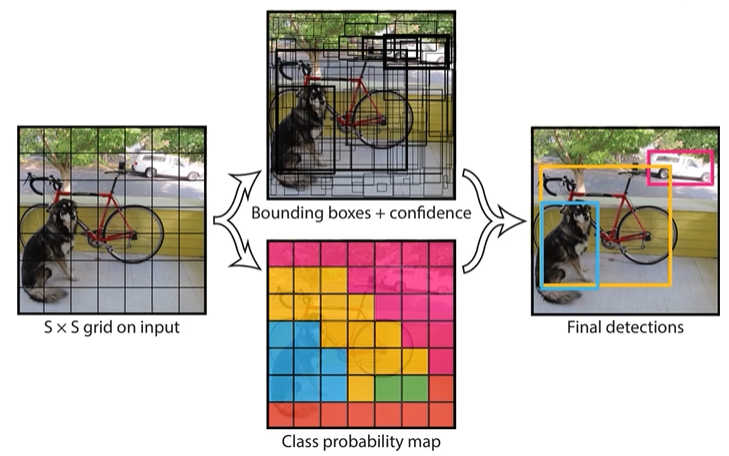

### 모델 구조
- 최종 출력은 7x7 해상도에 30 채널의 결과가 나오게 된다.
- grid를 SxS로 나누게 되는데, S가 7이 된다.
- S는 마지막 conv layer의 해상도로 결정된다.


- 왜 30 채널인가?
- Bounding box의 anchor는 2개를 사용함 (B == 2)
    - x, y, w, h, object score 5개가 들어있음


- Class는 20개의 object class를 고려함 (C == 20)

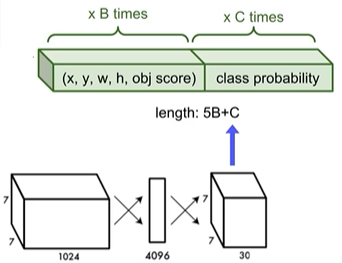

---
## 2. SSD
- Yolo는 맨 마지막 layer에서 한번만 prediction을 하기 때문에 Localize 정확도가 떨어진다.


- Multi-scale object를 더 잘 처리하기 위해서, 중간 feature map를 각 해상도에 적절한 bbox를 출력할 수 있도록 Multi scale 구조를 갖는다.
- Multi scale 각각의 feature map에 따라서 다양한 bbox shape을 고려할 수 있게 됨.

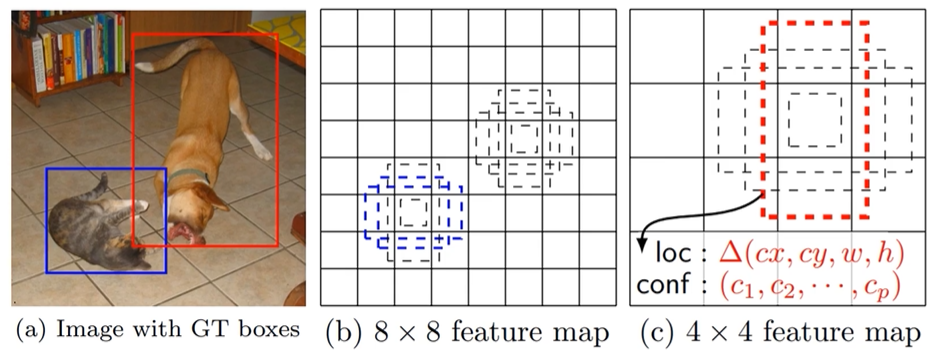